In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#calculating basic summary stats
mc_final = pd.read_csv('../datasets/management_consulting_final.csv')

mc_final.agg({
    "Management Consulting Services Total (£m)": ["min", "max", "median", "skew", "mean", "std"],
    "Gross Added Value": ["min", "max", "median", "skew", "mean", "std"],
    "Hours Worked": ["min", "max", "median", "skew", "mean", "std"],
    "Hourly Output": ["min", "max", "median", "skew", "mean", "std"]
}).round(2)


,Management Consulting Services Total (£m),Gross Added Value,Hours Worked,Hourly Output
min,0.00,33.69,50.38,62.25
max,24037.70,101.67,113.47,97.21
median,10499.10,58.68,67.72,79.11
skew,0.15,0.69,0.38,0.14
mean,11341.20,61.21,76.39,79.66
std,6598.97,17.53,18.55,7.76


In [3]:
print(mc_final.head(2))
mc_final.dtypes #double checking dtypes

   Quarter  Management Consulting Services Total (£m)  Gross Added Value  \
0  1998 Q1                                        0.0          33.809464   
1  1998 Q2                                        0.0          38.271420   

   Hours Worked  Hourly Output  
0     50.378520      67.110871  
1     51.292872      74.613526  


Quarter                                       object
Management Consulting Services Total (£m)    float64
Gross Added Value                            float64
Hours Worked                                 float64
Hourly Output                                float64
dtype: object

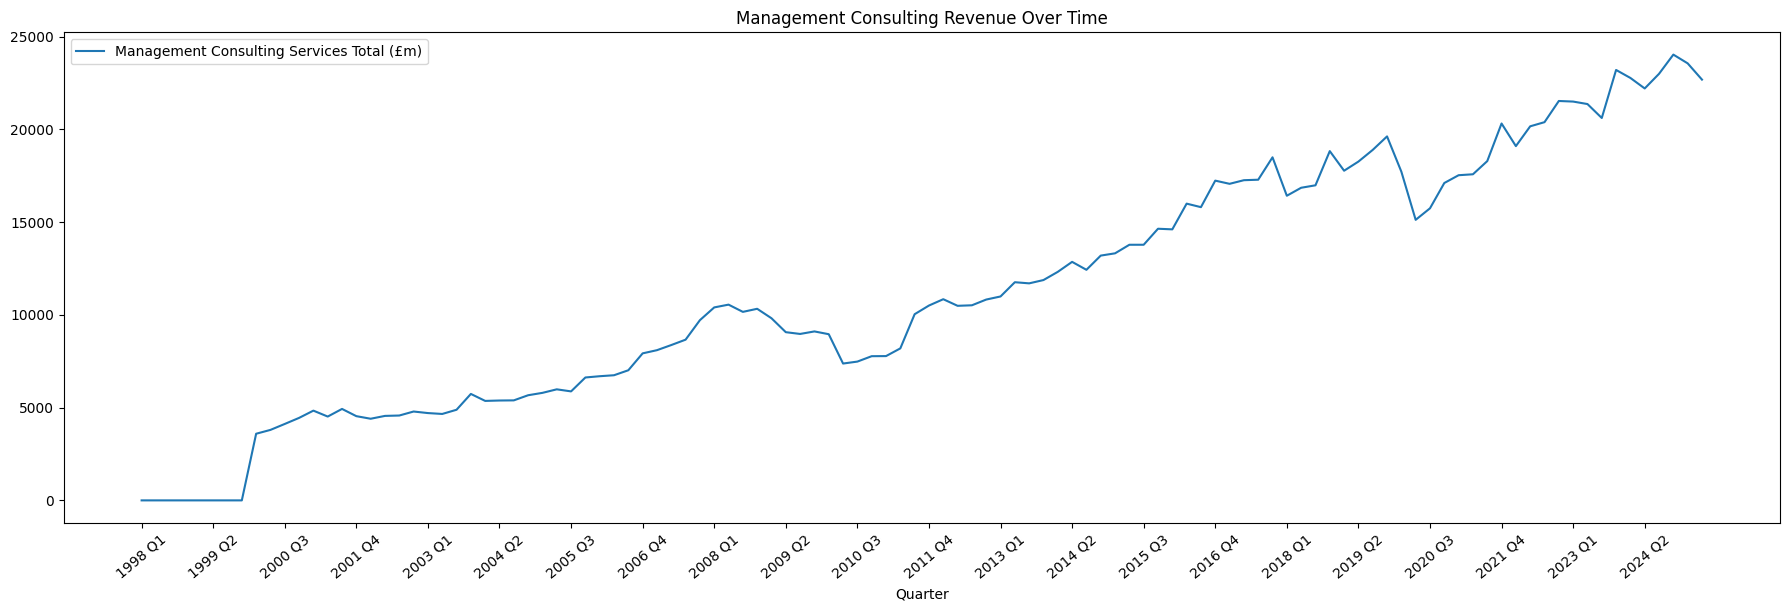

In [4]:
#general overview of revenue earned; including external factors like inflation, etc.
ax = mc_final.plot(x="Quarter", y="Management Consulting Services Total (£m)", kind="line", figsize=(18, 6))
ax.set_xticks(range(0, len(mc_final), 5))  #every 5 quarters
ax.set_xticklabels(mc_final["Quarter"].iloc[::5], rotation=40) #used some ai assistance on this line to make the ticker labels follow the ticker itself.
plt.tight_layout()
plt.title("Management Consulting Revenue Over Time")
plt.show()

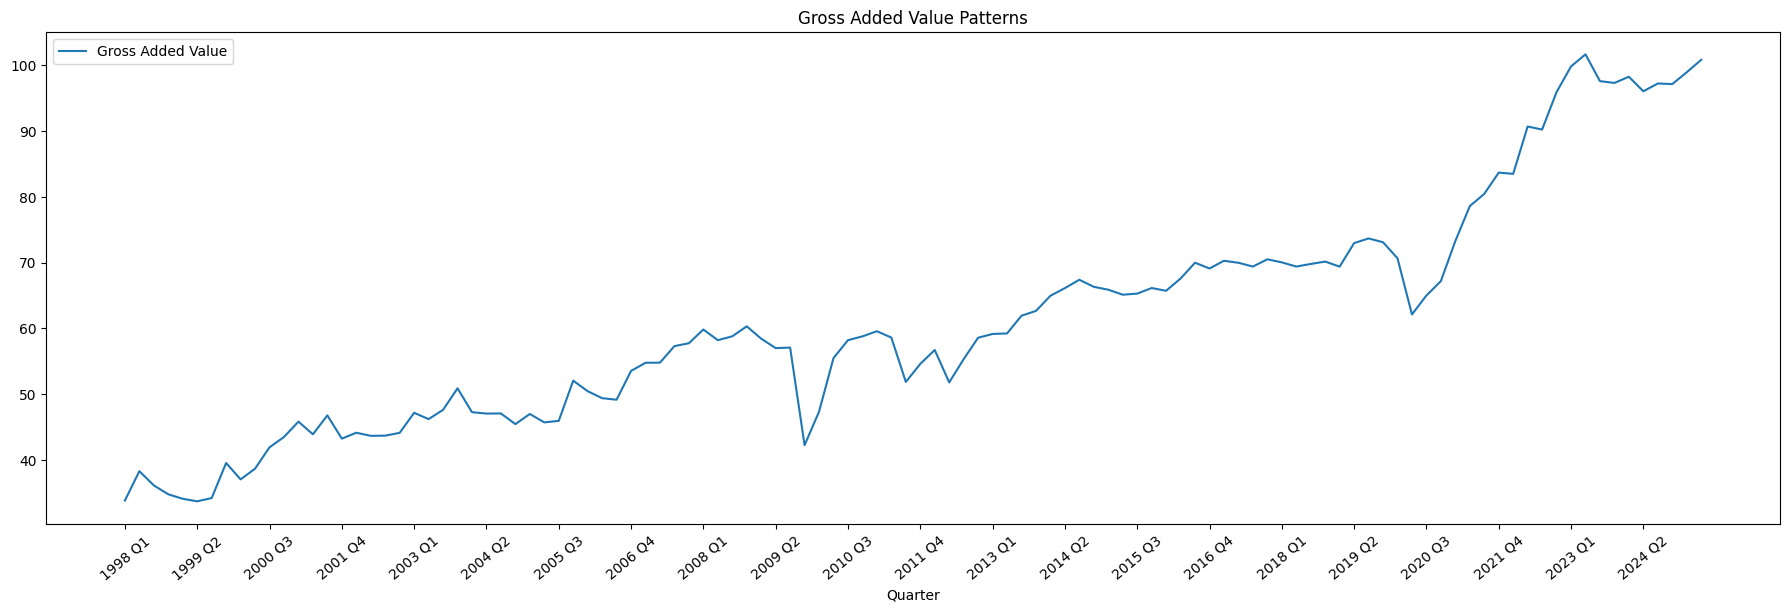

In [5]:
#general overview of index aggregrated gva. so here we're just spotting any patterns instead of looking at actual money values...
ax = mc_final.plot(x="Quarter", y="Gross Added Value", kind="line", figsize=(18, 6))
ax.set_xticks(range(0, len(mc_final), 5))  #every 5 quarters
ax.set_xticklabels(mc_final["Quarter"].iloc[::5], rotation=40) 
plt.tight_layout()
plt.title("Gross Added Value Patterns")
plt.show()

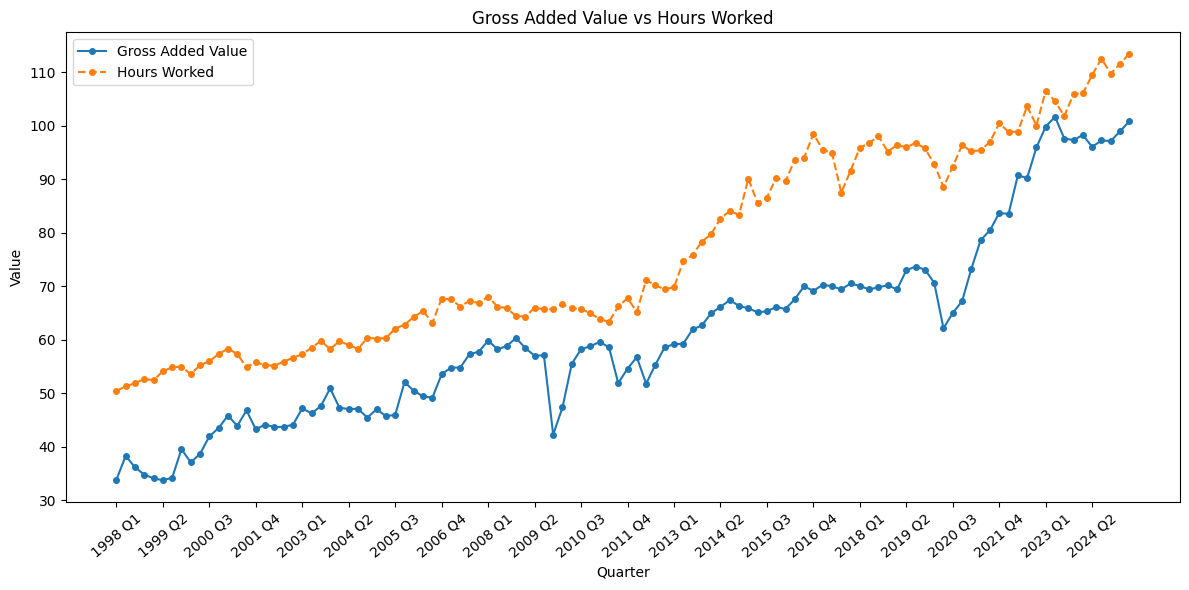

In [6]:
#general overview of index aggregated gva vs hours worked. again spotting patterns...
plt.figure(figsize=(12, 6))
plt.plot(mc_final["Quarter"], mc_final["Gross Added Value"], marker='o', linestyle='-', label="Gross Added Value", markersize=4)
plt.plot(mc_final["Quarter"], mc_final["Hours Worked"], marker='o', linestyle='--', label="Hours Worked", markersize=4)

plt.xticks(ticks=range(0, len(mc_final), 5), labels=mc_final["Quarter"].iloc[::5], rotation=40)

plt.xlabel("Quarter")
plt.ylabel("Value")
plt.title("Gross Added Value vs Hours Worked")
plt.legend()
plt.tight_layout()
plt.show()

looks like there is a positive relationship between gva and hours worked. will need to correlate later on... is it correlation or causation?

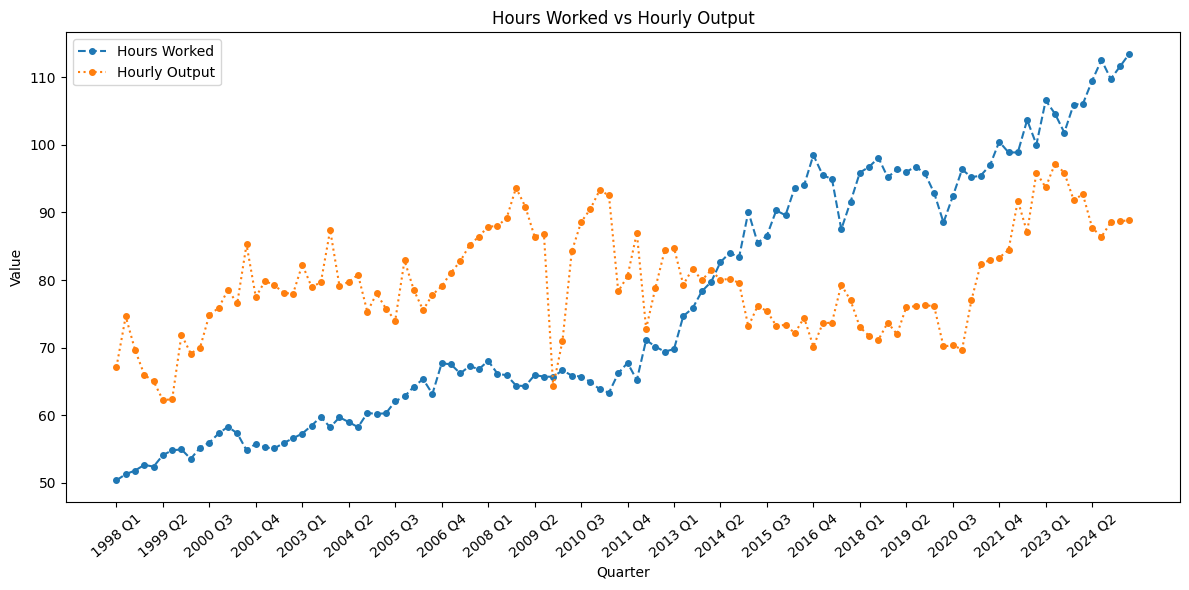

In [38]:
#general overview of index aggregated hours worked vs output over time
plt.figure(figsize=(12, 6))
plt.plot(mc_final["Quarter"], mc_final["Hours Worked"], marker='o', linestyle='--', label="Hours Worked", markersize=4)
plt.plot(mc_final["Quarter"], mc_final["Hourly Output"], marker='o', linestyle=':', label="Hourly Output", markersize=4)

plt.xticks(ticks=range(0, len(mc_final), 5), labels=mc_final["Quarter"].iloc[::5], rotation=40)

plt.xlabel("Quarter")
plt.ylabel("Value")
plt.title("Hours Worked vs Hourly Output")
plt.legend()
plt.tight_layout()
plt.show()


so far cannot see any visual positive link between hours worked and hourly output. this is a zooming into the idea of our previous graph. it doesnt seem that the hours you actually put in affects your output per hour. we will look at this next.

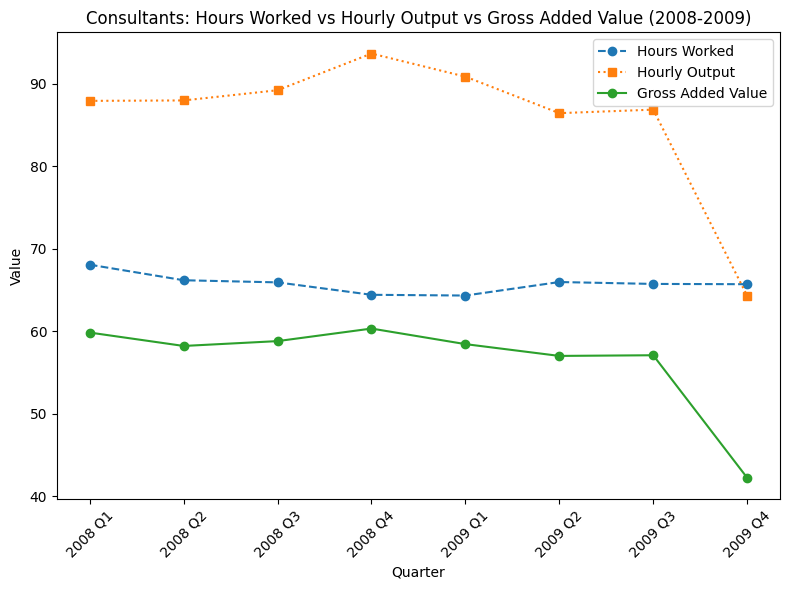

In [39]:
#zooming into the outlier (big dip in gva and thus hourly output) around the 2009 area
#assuming its due to the global financial crisis.

mask = mc_final['Quarter'].str.startswith(('2008', '2009'))
mc_zoom = mc_final[mask]
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(mc_zoom['Quarter'], mc_zoom['Hours Worked'], marker='o', linestyle='--', label='Hours Worked')
ax.plot(mc_zoom['Quarter'], mc_zoom['Hourly Output'], marker='s', linestyle=':', label='Hourly Output')
ax.plot(mc_zoom['Quarter'], mc_zoom['Gross Added Value'], marker='o', linestyle='-', label='Gross Added Value')

ax.set_xlabel('Quarter')
ax.set_ylabel('Value')
ax.set_title('Consultants: Hours Worked vs Hourly Output vs Gross Added Value (2008-2009)')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
